In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE

import pandas as pd
import numpy as np
import seaborn as sns 

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

In [ ]:
!pwd

In [ ]:
df = pd.read_csv('/Users/elmi/Projects/CloudWine/data/raw/winemag-data-130k-v2.csv')
df.head()

In [ ]:
df[['country', 'province', 'region_1', 'variety', 'winery']].describe()

In [ ]:
df['region_1'].value_counts().plot(kind='bar')

In [ ]:
df_sample = df.sample(n=1000, random_state=1)

In [ ]:
df_sample['region_1'].value_counts().plot(kind='bar')

In [ ]:
df_sample.to_csv('/Users/elmi/Projects/CloudWine/data/raw/sample.csv', index=None)

## TF-IDF Model

In [10]:
df = pd.read_csv('/Users/elmi/Projects/CloudWine/data/raw/sample.csv')

In [ ]:
train_set = df[['description', 'title']][:10]
corpus = train_set['description'].tolist()

In [ ]:
print(len(corpus), corpus[5])

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=1, stop_words="english")
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())
print(X.shape)

In [ ]:
doc_term_matrix = X.todense()
df_freq = pd.DataFrame(doc_term_matrix, 
                  columns=vectorizer.get_feature_names(), 
                  index=train_set['title'])
df_freq

In [ ]:
ax = sns.heatmap(pd.DataFrame(cosine_similarity(df_freq, df_freq), 
                  columns=train_set['title'],
                    index=train_set['title']))

### Subset - top n provinces

In [49]:
df = pd.read_csv('/Users/elmi/Projects/CloudWine/data/raw/winemag-data-130k-v2.csv')

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
6096,6096,Argentina,"Vanilla, popcorn, resiny oak, pear and pineapp...",Felino,87,18.0,Mendoza Province,Mendoza,NaN,Michael Schachner,@wineschach,Viña Cobos 2014 Felino Chardonnay (Mendoza),Chardonnay,Viña Cobos
73175,73175,Portugal,Produced from four parcels of 100-year-old vin...,O Fugitivo Vinhas Centenárias,93,50.0,Dão,NaN,NaN,Roger Voss,@vossroger,Casa da Passarella 2012 O Fugitivo Vinhas Cent...,Portuguese Red,Casa da Passarella
74452,74452,Italy,Attems' fresh Pinot Grigio would wash down nic...,NaN,86,19.0,Northeastern Italy,Venezia Giulia,NaN,NaN,NaN,Attems 2010 Pinot Grigio (Venezia Giulia),Pinot Grigio,Attems
124558,124558,Italy,Braised lamb shanks or cotechino sausage with ...,NaN,89,32.0,Veneto,Valpolicella Classico Superiore Ripasso,NaN,NaN,NaN,Montecariano 2008 Valpolicella Classico Super...,"Corvina, Rondinella, Molinara",Montecariano
40859,40859,US,Intensely ripe and ruddy black cherry and berr...,Estate,87,30.0,New York,North Fork of Long Island,Long Island,Anna Lee C. Iijima,NaN,Jamesport 2013 Estate Cabernet Franc (North Fo...,Cabernet Franc,Jamesport


In [50]:
top_prov = df['province'].value_counts().nlargest(5).index.tolist()
data_subset = df[df['province'].isin(top_prov)]

In [51]:
data_subset.shape

(4698, 14)

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=1, stop_words="english")
X = vectorizer.fit_transform(data_subset['description'].tolist())
# print(vectorizer.get_feature_names())
print(X.shape)

(4698, 7766)


In [53]:
x = X.toarray()
y = data_subset['province'].to_numpy()

In [54]:
feat_cols = [ 'embedding'+str(i) for i in range(x.shape[1]) ]
df_embed = pd.DataFrame(x,columns=feat_cols)
df_embed['y'] = y
df_embed['label'] = df_embed['y'].apply(lambda i: str(i))

In [55]:
df_embed

,embedding0,embedding1,embedding2,embedding3,embedding4,embedding5,embedding6,embedding7,embedding8,embedding9,...,embedding7758,embedding7759,embedding7760,embedding7761,embedding7762,embedding7763,embedding7764,embedding7765,y,label
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,California,California
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.338056,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,California,California
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,California,California
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,California,California
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,California,California
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4693,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,California,California
4694,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Washington,Washington
4695,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,California,California
4696,0.170245,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,California,California


In [56]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(x)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 4698 samples in 2.436s...
[t-SNE] Computed neighbors for 4698 samples in 486.173s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4698
[t-SNE] Computed conditional probabilities for sample 2000 / 4698
[t-SNE] Computed conditional probabilities for sample 3000 / 4698
[t-SNE] Computed conditional probabilities for sample 4000 / 4698
[t-SNE] Computed conditional probabilities for sample 4698 / 4698
[t-SNE] Mean sigma: 0.239361
[t-SNE] KL divergence after 250 iterations with early exaggeration: 84.589157
[t-SNE] KL divergence after 300 iterations: 3.431244


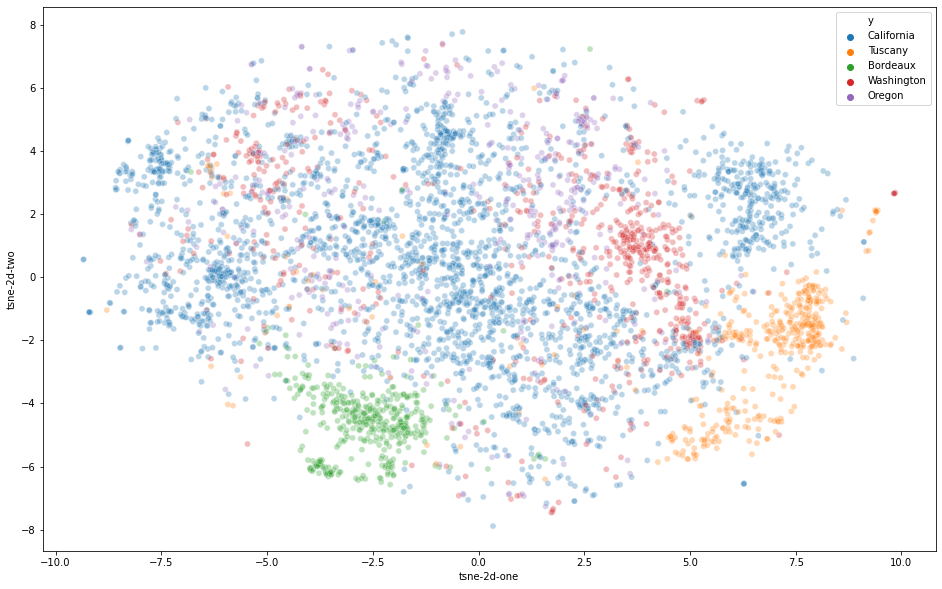

In [57]:
df_embed['tsne-2d-one'] = tsne_results[:,0]
df_embed['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
#     palette=sns.color_palette("hls"),
    data=df_embed,
    legend="full",
    alpha=0.3
)

### Subset - top n regions

In [2]:
df = pd.read_csv('/Users/elmi/Projects/CloudWine/data/raw/winemag-data-130k-v2.csv')
top_prov = df['region_1'].value_counts().nlargest(5).index.tolist()
data_subset = df[df['region_1'].isin(top_prov)]

In [4]:
data_subset.shape

(16674, 14)

In [5]:
top_prov

['Napa Valley',
 'Columbia Valley (WA)',
 'Russian River Valley',
 'California',
 'Paso Robles']

In [12]:
data_subset.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
10,10,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,87,19.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature
23,23,US,This wine from the Geneseo district offers aro...,Signature Selection,87,22.0,California,Paso Robles,Central Coast,Matt Kettmann,@mattkettmann,Bianchi 2011 Signature Selection Merlot (Paso ...,Merlot,Bianchi
43,43,US,"The clean, brisk mouthfeel gives this slightly...",NaN,86,14.0,California,Paso Robles,Central Coast,NaN,NaN,Robert Hall 2011 Sauvignon Blanc (Paso Robles),Sauvignon Blanc,Robert Hall
55,55,US,This shows jelly-like flavors of orange and pe...,Estate Bottled,85,30.0,California,Napa Valley,Napa,NaN,NaN,RustRidge 2010 Estate Bottled Chardonnay (Napa...,Chardonnay,RustRidge
59,59,US,"Aromas of cranberry, barrel spice and herb are...",NaN,86,55.0,Washington,Columbia Valley (WA),Columbia Valley,Sean P. Sullivan,@wawinereport,Mellisoni 2014 Malbec (Columbia Valley (WA)),Malbec,Mellisoni


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=1, stop_words="english")
X = vectorizer.fit_transform(data_subset['description'].tolist())
# print(vectorizer.get_feature_names())
print(X.shape)

(16674, 11485)


In [7]:
x = X.toarray()
y = data_subset['region_1'].to_numpy()

In [8]:
feat_cols = [ 'embedding'+str(i) for i in range(x.shape[1]) ]
df_embed = pd.DataFrame(x,columns=feat_cols)
df_embed['y'] = y
df_embed['label'] = df_embed['y'].apply(lambda i: str(i))

In [9]:
df_embed

,embedding0,embedding1,embedding2,embedding3,embedding4,embedding5,embedding6,embedding7,embedding8,embedding9,...,embedding11477,embedding11478,embedding11479,embedding11480,embedding11481,embedding11482,embedding11483,embedding11484,y,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Napa Valley,Napa Valley
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Paso Robles,Paso Robles
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Paso Robles,Paso Robles
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Napa Valley,Napa Valley
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Columbia Valley (WA),Columbia Valley (WA)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16669,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Columbia Valley (WA),Columbia Valley (WA)
16670,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Columbia Valley (WA),Columbia Valley (WA)
16671,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Columbia Valley (WA),Columbia Valley (WA)
16672,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Napa Valley,Napa Valley


In [10]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(x)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 16674 samples in 14.096s...
[t-SNE] Computed neighbors for 16674 samples in 6546.814s...
[t-SNE] Computed conditional probabilities for sample 1000 / 16674
[t-SNE] Computed conditional probabilities for sample 2000 / 16674
[t-SNE] Computed conditional probabilities for sample 3000 / 16674
[t-SNE] Computed conditional probabilities for sample 4000 / 16674
[t-SNE] Computed conditional probabilities for sample 5000 / 16674
[t-SNE] Computed conditional probabilities for sample 6000 / 16674
[t-SNE] Computed conditional probabilities for sample 7000 / 16674
[t-SNE] Computed conditional probabilities for sample 8000 / 16674
[t-SNE] Computed conditional probabilities for sample 9000 / 16674
[t-SNE] Computed conditional probabilities for sample 10000 / 16674
[t-SNE] Computed conditional probabilities for sample 11000 / 16674
[t-SNE] Computed conditional probabilities for sample 12000 / 16674
[t-SNE] Computed conditional probabilities fo

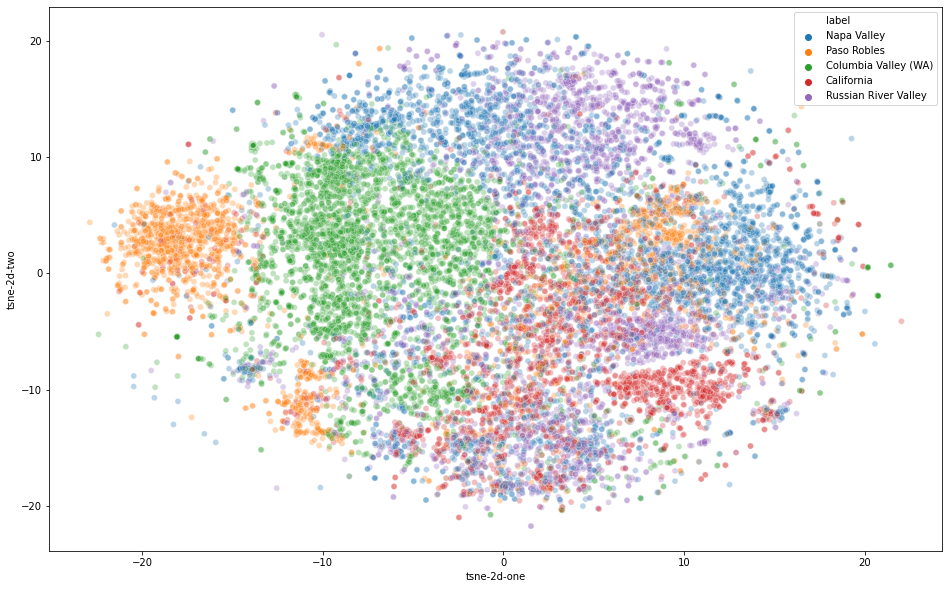

In [14]:
df_embed['tsne-2d-one'] = tsne_results[:,0]
df_embed['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="label",
#     palette=sns.color_palette("hls"),
    data=df_embed,
    legend="full",
    alpha=0.3
)

In [13]:
df_embed

,embedding0,embedding1,embedding2,embedding3,embedding4,embedding5,embedding6,embedding7,embedding8,embedding9,...,embedding11477,embedding11478,embedding11479,embedding11480,embedding11481,embedding11482,embedding11483,embedding11484,y,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Napa Valley,Napa Valley
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Paso Robles,Paso Robles
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Paso Robles,Paso Robles
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Napa Valley,Napa Valley
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Columbia Valley (WA),Columbia Valley (WA)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16669,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Columbia Valley (WA),Columbia Valley (WA)
16670,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Columbia Valley (WA),Columbia Valley (WA)
16671,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Columbia Valley (WA),Columbia Valley (WA)
16672,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Napa Valley,Napa Valley


### Subset - top n varieties

In [30]:
df = pd.read_csv('/Users/elmi/Projects/CloudWine/data/raw/winemag-data-130k-v2.csv')
top_prov = df['variety'].value_counts().nlargest(10).index.tolist()
data_subset = df[df['variety'].isin(top_prov)]

In [31]:
data_subset = data_subset.sample(n=2000)

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=1, stop_words="english")
X = vectorizer.fit_transform(data_subset['description'].tolist())
# print(vectorizer.get_feature_names())
print(X.shape)

(2000, 5556)


In [33]:
x = X.toarray()
y = data_subset['variety'].to_numpy()

In [34]:
feat_cols = [ 'embedding'+str(i) for i in range(x.shape[1]) ]
df_embed = pd.DataFrame(x,columns=feat_cols)
df_embed['y'] = y
df_embed['label'] = df_embed['y'].apply(lambda i: str(i))

In [35]:
df_embed

,embedding0,embedding1,embedding2,embedding3,embedding4,embedding5,embedding6,embedding7,embedding8,embedding9,...,embedding5548,embedding5549,embedding5550,embedding5551,embedding5552,embedding5553,embedding5554,embedding5555,y,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,Riesling,Riesling
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,Red Blend,Red Blend
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,Rosé,Rosé
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,Red Blend,Red Blend
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.282322,0.0,Syrah,Syrah
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,Chardonnay,Chardonnay
1996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,Red Blend,Red Blend
1997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,Cabernet Sauvignon,Cabernet Sauvignon
1998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,Riesling,Riesling


In [36]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(x)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.311s...
[t-SNE] Computed neighbors for 2000 samples in 37.608s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 0.235749
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.010773
[t-SNE] KL divergence after 300 iterations: 2.654264


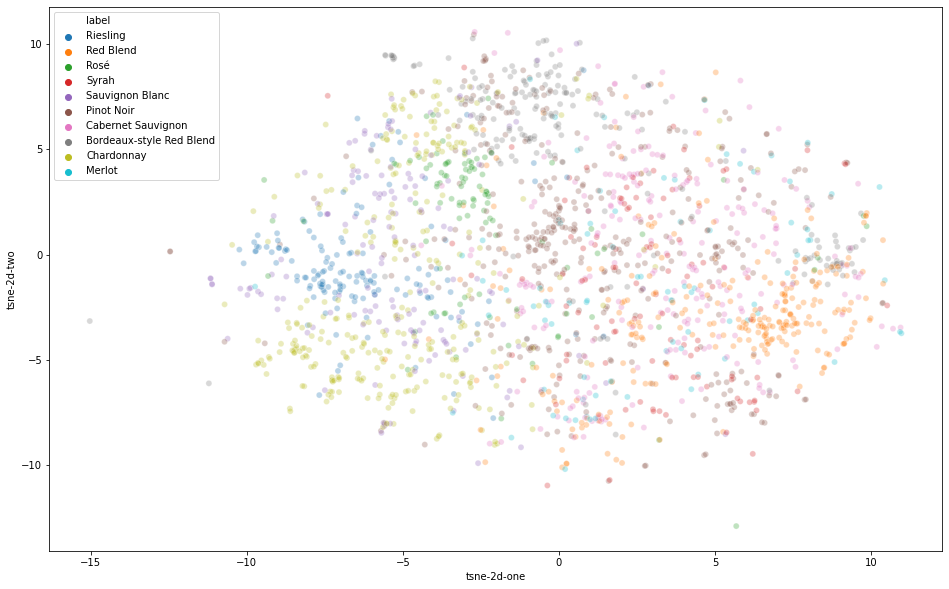

In [37]:
df_embed['tsne-2d-one'] = tsne_results[:,0]
df_embed['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="label",
#     palette=sns.color_palette("hls"),
    data=df_embed,
    legend="full",
    alpha=0.3
)

In [38]:
df_embed

,embedding0,embedding1,embedding2,embedding3,embedding4,embedding5,embedding6,embedding7,embedding8,embedding9,...,embedding5550,embedding5551,embedding5552,embedding5553,embedding5554,embedding5555,y,label,tsne-2d-one,tsne-2d-two
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,Riesling,Riesling,-3.471051,-1.787390
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,Red Blend,Red Blend,8.894832,-0.532907
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,Rosé,Rosé,-3.911456,4.808308
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,Red Blend,Red Blend,6.371197,-0.353499
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.282322,0.0,Syrah,Syrah,4.503217,2.309513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,Chardonnay,Chardonnay,-7.919106,-3.879549
1996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,Red Blend,Red Blend,4.963001,-3.273735
1997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,Cabernet Sauvignon,Cabernet Sauvignon,1.643039,3.811250
1998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,Riesling,Riesling,-8.963372,0.307893


### Subset - top n variety + region combination

In [39]:
df = pd.read_csv('/Users/elmi/Projects/CloudWine/data/raw/winemag-data-130k-v2.csv')


In [47]:
df = df[(df['variety'].notna()) & (df['region_1'].notna())]

In [48]:
df['variety_region'] = df[['variety', 'region_1']].agg('-'.join, axis=1)

In [50]:
top_prov = df['variety_region'].value_counts().nlargest(10).index.tolist()
data_subset = df[df['variety_region'].isin(top_prov)]

In [52]:
data_subset = data_subset.sample(n=2000)

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=1, stop_words="english")
X = vectorizer.fit_transform(data_subset['description'].tolist())
# print(vectorizer.get_feature_names())
print(X.shape)

(2000, 4931)


In [59]:
x = X.toarray()
y = data_subset['variety_region'].to_numpy()

In [60]:
feat_cols = [ 'embedding'+str(i) for i in range(x.shape[1]) ]
df_embed = pd.DataFrame(x,columns=feat_cols)
df_embed['y'] = y
df_embed['label'] = df_embed['y'].apply(lambda i: str(i))

In [61]:
df_embed

,embedding0,embedding1,embedding2,embedding3,embedding4,embedding5,embedding6,embedding7,embedding8,embedding9,...,embedding4923,embedding4924,embedding4925,embedding4926,embedding4927,embedding4928,embedding4929,embedding4930,y,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,Nebbiolo-Barolo,Nebbiolo-Barolo
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,Cabernet Sauvignon-Napa Valley,Cabernet Sauvignon-Napa Valley
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.250281,0.0,0.0,0.0,0.0,Cabernet Sauvignon-Napa Valley,Cabernet Sauvignon-Napa Valley
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,Nebbiolo-Barolo,Nebbiolo-Barolo
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.226023,0.0,0.000000,0.0,0.0,0.0,0.0,Sangiovese-Brunello di Montalcino,Sangiovese-Brunello di Montalcino
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,Nebbiolo-Barolo,Nebbiolo-Barolo
1996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,Chardonnay-Russian River Valley,Chardonnay-Russian River Valley
1997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,Cabernet Sauvignon-Napa Valley,Cabernet Sauvignon-Napa Valley
1998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,Chardonnay-Russian River Valley,Chardonnay-Russian River Valley


In [57]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(x)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.335s...
[t-SNE] Computed neighbors for 2000 samples in 34.430s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 0.244709
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.231850
[t-SNE] KL divergence after 300 iterations: 2.443559


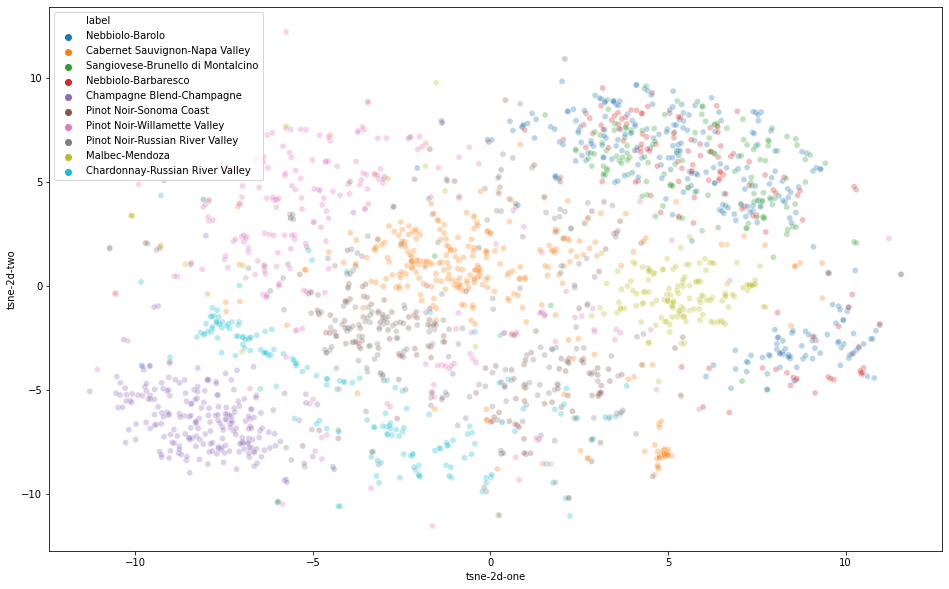

In [62]:
df_embed['tsne-2d-one'] = tsne_results[:,0]
df_embed['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="label",
#     palette=sns.color_palette("hls"),
    data=df_embed,
    legend="full",
    alpha=0.3
)

In [71]:
df['variety_region'].value_counts().nlargest(50)

Cabernet Sauvignon-Napa Valley                   1771
Nebbiolo-Barolo                                  1599
Pinot Noir-Willamette Valley                     1456
Pinot Noir-Russian River Valley                  1442
Champagne Blend-Champagne                        1221
Pinot Noir-Sonoma Coast                           970
Malbec-Mendoza                                    941
Chardonnay-Russian River Valley                   846
Sangiovese-Brunello di Montalcino                 824
Nebbiolo-Barbaresco                               794
Rosé-Côtes de Provence                            753
Riesling-Alsace                                   717
Pinot Noir-Sta. Rita Hills                        656
Sangiovese Grosso-Brunello di Montalcino          645
Red Blend-Toscana                                 644
Tempranillo-Rioja                                 629
Cabernet Sauvignon-Columbia Valley (WA)           629
Riesling-Finger Lakes                             573
Chardonnay-Chablis          